## Laboratorio 3 - Clasificación

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 3 - Clasificador de Residuos

In [1]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
from skimage.transform import rescale
#Matplotlib
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### 1) Crea un clasificador que permita saber qué tipo de resiudo aparece en una imagen. Realiza al menos dos configuraciones y dibuja una tabla donde se muestre la precisión del modelo

## Carga y Visualización de Datos

In [2]:
dirname = os.path.join(os.getcwd(), 'garbage')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot = ''
cant = 0

print("Leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")          
            if prevRoot != root:
                print(root)
                prevRoot = root
                directories.append(root)
                dircount.append(cant)
                cant = 0
#Ultimo directorio
cant = cant+1
dircount.append(cant)
dircount = dircount[1:]
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('Total de imágenes:',sum(dircount))

Leyendo imagenes de  /Users/joseignacionavassanz/Datamining_UFV/Lab3/entregable3/garbage/
/Users/joseignacionavassanz/Datamining_UFV/Lab3/entregable3/garbage/paper
/Users/joseignacionavassanz/Datamining_UFV/Lab3/entregable3/garbage/metal
/Users/joseignacionavassanz/Datamining_UFV/Lab3/entregable3/garbage/cardboard
/Users/joseignacionavassanz/Datamining_UFV/Lab3/entregable3/garbage/trash
/Users/joseignacionavassanz/Datamining_UFV/Lab3/entregable3/garbage/glass
/Users/joseignacionavassanz/Datamining_UFV/Lab3/entregable3/garbage/plastic
Directorios leidos: 6
Imagenes en cada directorio [594, 410, 403, 137, 501, 482]
Total de imágenes: 2527


In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.uint8) # Convierto de lista a numpy
 
# Normalizamos las clases
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  2527
0 paper
1 metal
2 cardboard
3 trash
4 glass
5 plastic
Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


Las imágenes tienen un tamaño de 384x512 y tienen cada una 3 componentes RGB (Red, Green, Blue). Estas componentes RGB representarán el color de cada píxel de la imagen por lo que buscamos crear un dataset con estos datos.

In [4]:
# Realizamos la transpuesta de la matriz RGB (nuestra matriz "X") ya que no podemos trabajar con 3 dimensiones. 
arr1_transpose = X.transpose()
z = np.concatenate(arr1_transpose, axis=0)
z = np.concatenate(z, axis=0)
z = z.transpose()
# Creamos un dataframe donde añadimos los valores por cada píxel de cada imagen de su Red, Green and Blue (uno por columna)
dataframe = pd.DataFrame(z)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,589814,589815,589816,589817,589818,589819,589820,589821,589822,589823
0,236,236,236,236,236,236,236,236,233,233,...,96,97,96,96,99,106,111,113,111,108
1,255,255,255,255,255,255,255,255,255,255,...,165,165,164,164,164,164,164,164,164,164
2,240,240,240,239,239,238,238,238,237,237,...,141,141,141,141,141,140,140,139,139,139
3,255,255,255,254,253,252,248,242,237,232,...,134,134,136,136,136,135,135,134,134,134
4,240,240,240,240,240,240,240,240,239,239,...,174,174,173,173,173,172,172,171,171,171


Al ser una matriz de 3 dimensiones, obtenemos 3 valores por cada píxel de cada imagen. Anteriormente teníamos una matriz de 384x512. El resultado de la multiplicación es 196608 píxeles. Cada uno de estos multiplicado por 3 dimensiones (R, G, B), nos da como resultante una matriz de 2527x589824, donde 589824 es el resultado de separar cada píxel en sus tres valores.

In [5]:
#Separamos en test de entrenamiento y de validacion 80-20
X_train, X_test, y_train, y_test = train_test_split(dataframe, y, test_size=0.2, random_state=42)

In [6]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,589814,589815,589816,589817,589818,589819,589820,589821,589822,589823
157,204,204,204,205,205,206,206,206,206,206,...,158,158,158,158,158,157,157,156,156,156
1173,154,152,151,152,156,157,156,154,151,151,...,58,58,57,56,56,55,55,54,54,54
836,225,225,225,224,224,223,223,223,222,222,...,84,82,81,79,73,67,63,61,62,64
2073,226,226,226,226,226,226,226,226,223,223,...,171,171,172,172,172,173,173,174,174,174
135,251,251,251,250,250,250,249,249,249,249,...,209,209,208,208,208,208,208,208,208,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,146,146,146,146,146,146,146,146,146,146,...,166,166,165,165,164,164,164,163,163,163
1095,65,66,67,67,67,67,66,65,68,68,...,145,147,144,144,144,144,144,144,143,143
1130,188,188,189,189,189,190,190,190,189,193,...,68,69,69,70,72,73,73,71,68,66
1294,234,235,235,231,224,218,215,215,210,213,...,185,185,187,191,190,185,185,177,150,119


In [7]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,589814,589815,589816,589817,589818,589819,589820,589821,589822,589823
1752,236,236,236,235,235,234,234,234,234,234,...,104,104,102,102,102,101,101,101,100,100
748,234,234,234,234,234,234,234,234,232,232,...,182,175,164,184,180,193,199,171,158,160
194,229,229,229,228,228,228,227,227,226,226,...,131,131,131,131,131,131,131,131,131,131
1099,255,255,255,255,255,255,255,255,255,255,...,92,91,93,92,91,90,91,92,94,95
1178,238,238,238,238,238,238,238,238,237,237,...,35,35,36,40,42,38,37,40,44,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,221,220,218,216,214,212,211,210,208,207,...,122,122,123,123,123,123,123,123,123,123
76,236,236,236,235,235,234,234,234,231,231,...,125,125,124,124,124,124,124,124,124,124
432,255,255,255,255,255,255,255,255,255,255,...,167,167,168,168,168,167,167,166,166,166
1124,238,237,237,236,235,234,233,233,235,236,...,109,109,112,109,109,111,111,109,109,111


In [8]:
#Volvemos a separar los datos de validacion 95-5 sobre X_test e y_test para poder realizar el punto 2 del entregable
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.95, random_state=42)

### Redes bayesianas

In [9]:
gnb = GaussianNB()
datosEntreno = gnb.fit(X_train, y_train)
prediccionBayes = gnb.predict(X_test)

In [10]:
matrizConfusion = confusion_matrix(y_test,prediccionBayes)
print(matrizConfusion)

[[16 18 13  5 11 48]
 [ 3 22  9 13 12 14]
 [ 0 10 55  6 12  4]
 [ 1  0  1 11  1  3]
 [ 4 13 11 21 22 32]
 [ 4  2 11  8 10 55]]


Comprobamos con el resultado de la matriz, la precisión será muy baja.

In [11]:
#Precisión del modelo
precision = round(accuracy_score(y_test, prediccionBayes), 3)
print('Precisión Bayes:', round((precision*100),2), '%')
print('Error Bayes:', round(100 - (precision*100),2), '%')

Precisión Bayes: 37.6 %
Error Bayes: 62.4 %


In [12]:
clases = ["cardboard","glass","metal","paper","plastic","trash"]
#Comprobando fiabilidad del modelo
aciertos = 0;
errores = 0;
totales = len(prediccionBayes)
i = 0
for valorPredicho in prediccionBayes:
    #Pasamos las clases a sus valores nominales
    print('Se ha predicho que la imagen es:\033[1m', clases[valorPredicho], '\033[0m Deberia ser:\033[1m', clases[y_test[i]], '\033[0m')
    if valorPredicho == y_test[i]:
        print('\033[92mACIERTO!\033[0m')
        aciertos = aciertos+1
    else:
        print('\033[91mERROR\033[0m')
        errores = errores+1
    i = i+1

Se ha predicho que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predicho que la imagen es: trash  Deberia ser: glass 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: trash 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predicho que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predicho que la imagen es: trash  Deberia ser: trash 
ACIERTO!
Se ha predicho que la imagen es: plastic  Deberia ser: metal 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: cardboard 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: cardboard 
ERROR
Se ha predicho que la imagen es: glass  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: trash  Debe

Se ha predicho que la imagen es: paper  Deberia ser: cardboard 
ERROR
Se ha predicho que la imagen es: glass  Deberia ser: cardboard 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predicho que la imagen es: plastic  Deberia ser: glass 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predicho que la imagen es: paper  Deberia ser: glass 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: cardboard 
ERROR
Se ha predicho que la imagen es: glass  Deberia ser: trash 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: trash 
ACIERTO!
Se ha predicho que la imagen es: trash  Deberia ser: trash 
ACIERTO!
Se ha predicho que la imagen es: trash  Deberia ser: glass 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: cardboard 
ERROR
Se ha predicho que la imagen es: cardboard  Deberia ser: cardboard 
ACIERTO!
Se ha predicho que la imagen es: trash  Deberia ser: trash 
ACIERTO!
Se ha predicho que la imagen es:

Se ha predicho que la imagen es: paper  Deberia ser: glass 
ERROR
Se ha predicho que la imagen es: plastic  Deberia ser: plastic 
ACIERTO!
Se ha predicho que la imagen es: paper  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: plastic  Deberia ser: glass 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predicho que la imagen es: glass  Deberia ser: cardboard 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: trash 
ACIERTO!
Se ha predicho que la imagen es: plastic  Deberia ser: trash 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: cardboard 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predicho que la imagen es: plastic  Deberia ser: paper 
ERROR
Se ha predicho que la imagen es: plastic  Deberia ser: trash 
ERROR
Se ha predicho que la imagen es: plastic  Deberia ser: plastic 
ACIERTO!
Se ha predicho que la imagen es: 

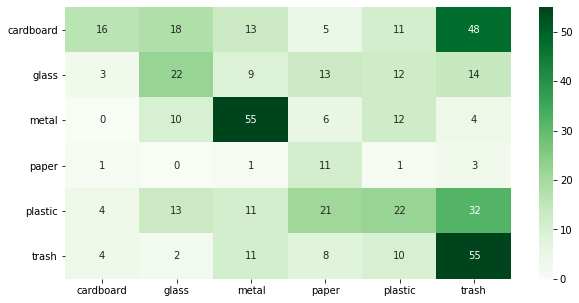

In [13]:
plt.figure(figsize = (10, 5))
sns.heatmap(matrizConfusion, cmap="Greens", annot=True, 
            xticklabels = ["cardboard","glass","metal","paper","plastic","trash"],
            yticklabels = ["cardboard","glass","metal","paper","plastic","trash"]);
plt.savefig("conf matrix")

In [14]:
print('Se han predicho correctamente',aciertos,'imágenes')
print('Se han predicho erróneamente',errores,'imágenes\n')
porcentajeAcierto = (aciertos/totales)*100
porcentajeError = (errores/totales)*100
print('El porcentaje de acierto ha sido del:',round(porcentajeAcierto,2),'%')
print('El porcentaje de error ha sido del:',round(porcentajeError,2),'%')

Se han predicho correctamente 181 imágenes
Se han predicho erróneamente 300 imágenes

El porcentaje de acierto ha sido del: 37.63 %
El porcentaje de error ha sido del: 62.37 %


El resultado de las imágenes correctamente predichas es igual a la suma de la diagonal de nuestra matriz de confusión.
Respecto a la figura de la matriz, los colores más oscuros de la diagonal son los que representan los aciertos de una categoría.

### 2) Elige 5 imágenes de diferentes residuos que no hayas usado ni para entrenar ni para validar el modelo y clasifícalas. Utiliza el modelo que consideres que clasifica mejor obtenido en el punto anterior. Indica con qué error ha funcionado el clasificador.

Utilizamos el 5% que habíamos guardado del conjunto test para este apartado.

In [15]:
#Predecir los valores para el conjunto de datos en X_val y compararlos con y_val
predicciones = gnb.predict(X_val)

#Comprobando fiabilidad del modelo
aciertos = 0;
errores = 0;
totales = len(predicciones)
i = 0
for valorPredicho in predicciones:
    #Pasamos las clases a sus valores nominales
    print('Se ha predicho que la imagen es:\033[1m', clases[valorPredicho], '\033[0m Deberia ser:\033[1m', clases[y_test[i]], '\033[0m')
    if valorPredicho == y_test[i]:
        print('\033[92mACIERTO!\033[0m')
        aciertos = aciertos+1
    else:
        print('\033[91mERROR\033[0m')
        errores = errores+1
    i = i+1

Se ha predicho que la imagen es: trash  Deberia ser: metal 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: glass 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: trash 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: metal 
ERROR
Se ha predicho que la imagen es: plastic  Deberia ser: metal 
ERROR
Se ha predicho que la imagen es: cardboard  Deberia ser: trash 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predicho que la imagen es: metal  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: cardboard  Deberia ser: cardboard 
ACIERTO!
Se ha predicho que la imagen es: glass  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: metal  Deberia ser: cardboard 
ERROR
Se ha predicho que la imagen es: trash  Deberia ser: plastic 
ERROR
Se ha predicho que la imagen es: trash  De

In [16]:
print('Se han predicho correctamente',aciertos,'imágenes')
print('Se han predicho erróneamente',errores,'imágenes\n')
porcentajeAcierto = (aciertos/totales)*100
porcentajeError = (errores/totales)*100
print('\033[92mEl porcentaje de acierto ha sido del:',round(porcentajeAcierto,2),'%\033[0m')
print('\033[91mEl porcentaje de error ha sido del:',round(porcentajeError,2),'%\033[0m')

Se han predicho correctamente 3 imágenes
Se han predicho erróneamente 22 imágenes

El porcentaje de acierto ha sido del: 12.0 %
El porcentaje de error ha sido del: 88.0 %


## Conclusión

El porcentaje de error tan alto es debido a la falta de igualdad entre los elementos de las clases. Es decir, encontramos categorías que presentan muchos más datos a analizar, como por ejemplo <i>paper</i> o <i>glass</i>. En cambio, hay categorías como <i>trash</i> que presentan un bajo índice de registros. La diferencia de istancias llega a ser de 594 el máximo respecto a 137 el mínimo, aproximadamente 3 veces menos.
Para poder subsanar este problema podríamos tratar de igualar los registros en todos los directorios.